## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [491]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [492]:
#Seu Código aqui....

apartment_data = pd.read_csv("aptos.csv")
apartment_data.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [493]:
def encode_string(dataframe: pd.DataFrame) -> list:

    """
    um resultado semelhante e talvez mais rápido 
    pode ser obtido pelo módulo: preprocessing do sklearn

    >> from sklean import preprocessing

    Args:
        dataframe: Um dataframe contendo as informações padronizadas
    
    Returns:
        uma lista de mesmo tamanho do dataset, contendo
        as string do dataframe representadas por um número
        que se baseia nas repetições.
    """

    known_names: list = []
    encoded: list = []

    for data in dataframe:

        if not data in known_names:known_names.append(data)
        encoded.append(known_names.index(data))

    return encoded


apartment_data['bairro_code'] = encode_string(apartment_data['bairro'])
apartment_data.head(5)

,metros,valor,quartos,vagas,reformado,bairro,bairro_code
0,107,560,3,2,0,Vila Lusitania,0
1,107,555,3,2,1,Vila Lusitania,0
2,49,196,2,1,0,Ferrazopolis,1
3,104,515,3,2,1,Centro,2
4,92,560,3,2,1,Vila Lusitania,0


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






<span style="color:green">**Resposta:**</pan>
- metros   : tamanho to imóvel em metros quadrados
- valor    : valor do imóvel, provavelmente na base do milhar
- quartos  : número  de quartos que o imóvel tem
- vagas    : números de vagas de garagem presentes
- reformado: dado binário para informar se o imóvel foi reformado (0 para não e 1 para sim)
- bairro   : bairro ou local onde o imóvel está localizado.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

<span style="color:green">**Resposta:**</span>

1.  Imagina-se que o valor do imóvel incrementa baseado no metro quadrado
2.  Imagina-se que o valor do imóvel também pode subir em regiões mais valorizadas (ou de acordo com um região qualquer)

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

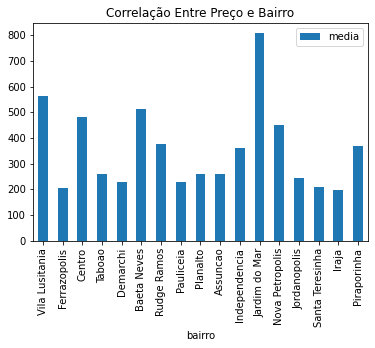

In [556]:
def get_price_by_neighboorhood() -> dict:

    """
    Calcula a média dos preços dos imóveis por bairro
    
    """

    neighboorhoods = apartment_data['bairro'].unique()
    mean_prices_and_neighboorhoods: dict = {}

    for neighboorhood in neighboorhoods:

        price_mean: float = round(apartment_data.loc[apartment_data['bairro'] == neighboorhood]['valor'].mean(), 1)
        mean_prices_and_neighboorhoods.update({neighboorhood : price_mean})

    return mean_prices_and_neighboorhoods


prices_and_neighboorhood: dict = get_price_by_neighboorhood()

x = prices_and_neighboorhood.keys()
y = prices_and_neighboorhood.values()

correlation_between_price_and_neighboorhood = pd.DataFrame({"bairro" : x, "media" : y})
correlation_between_price_and_neighboorhood.plot(kind='bar', x='bairro', y='media', title='Correlação Entre Preço e Bairro')
plt.show()

In [495]:
# Os lugares onde possui os imóveis mais caros

correlation_between_price_and_neighboorhood.nlargest(5, 'media')

,bairro,media
11,Jardim do Mar,807.5
0,Vila Lusitania,564.2
5,Baeta Neves,511.1
2,Centro,479.9
12,Nova Petropolis,450.0


In [496]:
# Os lugares onde possui os imóveis mais baratos

correlation_between_price_and_neighboorhood.nsmallest(5, 'media')

,bairro,media
15,Iraja,197.5
1,Ferrazopolis,204.0
14,Santa Teresinha,210.0
4,Demarchi,229.4
7,Pauliceia,230.0


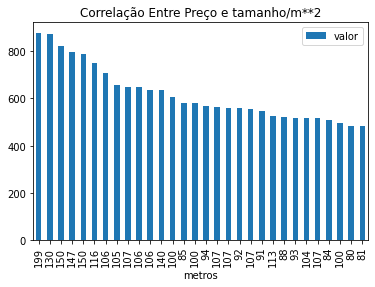

In [593]:
prices_and_size = apartment_data[['metros', 'valor']]
thirty_largets_prices_and_size = prices_and_size.nlargest(30, 'valor')
thirty_largets_prices_and_size.plot(kind='bar', x='metros', y='valor', title='Correlação Entre Preço e tamanho/m**2')
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

O conjunto de dados já possui as informações classificadas e rotuladas com as informaçoes necessárias para que o algorítimo possa prever um resultado, a partir do que foi aprendido com estes. Logo, podemos utilizar um algorítimo de aprendizado supervisionado.

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

<span style="color:green">1. algoritimo Regressão linear</span><br>
<span style="color:green">2. algoritimo RandomForestRegressor</span><br>

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
#Seu Código aqui...

from sklearn.model_selection import train_test_split

features: pd.DataFrame = apartment_data[['metros', 'quartos', 'vagas', 'reformado', 'bairro_code']]
labels  : pd.DataFrame = apartment_data['valor']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=200)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

<span style="color:green">Regressão linear</span>

In [592]:
#Seu Código aqui...

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

lr_score_result: float = linear_regression.score(x_test, y_test) * 100
print("Algoritimo 1 - Regressão Linear - Score: %.1f%%"%(lr_score_result))

r2_lr_cross_validation_score = cross_val_score(linear_regression, x_train, y_train, cv=10, scoring="r2").mean() * 100
print("R2 score: %.1f%%"%(r2_lr_cross_validation_score))

Algoritimo 1 - Regressão Linear - Score: 81.4%
R2 score: 73.6%


### Algoritmo 2

<span style="color:green">RandomForestRegressor</span>

In [586]:
#Seu Código aqui...
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)
random_forest_regressor.score(x_test, y_test)

random_forest_regressor_result: float = random_forest_regressor.score(x_test, y_test) * 100
print("Algoritimo 2 - RandomForestRegressor - Score: %.1f%%"%(random_forest_regressor_result))

r2_rfrr_cross_validation_score = cross_val_score(random_forest_regressor, x_train, y_train, cv=10, scoring="r2").mean() * 100
print("R2 score: %.1f%%"%(r2_rfrr_cross_validation_score))

Algoritimo 2 - RandomForestRegressor - Score: 68.4%
R2 score: 68.9%


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 84.4% | 68.2% |
| teste  | 73.% | 69.2% |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

<span style="color:green">Resposta:</span><br>
O melhor algorítimo foi o LinearRegression, pois foi o algorítimo com a melhor acurácia e que se aproxima do resultado esperado.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
#Seu Código aqui...

metros, quartos, vagas, reformado, centro = 65, 2, 2, 1, 2

dreams_apartment: list = [metros, quartos, vagas, reformado, centro]
lr_apartment_price = linear_regression.predict([dreams_apartment])[0]

print("Este apartamento vale aproximadamente: R$ %.1f mil"%(lr_apartment_price))

Este apartamento vale aproximadamente: R$ 334.9 mil


/home/someone/Downloads/checkpoint1/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

<span style="color:green">Resposta:</span><br>
Sim, o modelo escolhido teve um bom resultado, pois quando comparado com os dados fornecidos com um exemplo real, a reposta do modelo foi bem próxima ao esperado.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

<span style="color:green">Resposta:</span><br>
Trabalharia melhor nos dados de entrada, para ter uma quantidade mais generalizada, podendo assim prever casos mais genéricos




